# 10 mins to Pandas

Source: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
print "environment ready"

environment ready


## Object Creation
### Create Series
Pass in a list of values

In [8]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### Create DataFrame
#### From a numpy array

In [13]:
dates = pd.date_range('20170620', periods =6)
df = pd.DataFrame(np.random.randn(6,4), # normal dist (mean, sigma)
                  index=dates, 
                  columns=list('ABCD')
                 )
df

,A,B,C,D
2017-06-20,1.220323,-0.539029,0.542580,-1.360667
2017-06-21,-0.132705,0.646692,0.653732,0.638759
2017-06-22,-0.425301,0.820835,-0.232504,-1.907543
2017-06-23,-0.683443,0.531592,-0.017452,-1.016288
2017-06-24,-0.911463,0.540812,1.348216,0.595751
2017-06-25,-0.000095,0.117720,-1.161682,-0.101164


#### From a Dict

In [12]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' }
                  )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


dict created dfs have specific datatypes depending on import

In [15]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

In [41]:
df.head() #see the top of data
df.tail() #see the bottom
df.index #see index (row) names
df.columns #see column names
df.values #see all values as an array
df.describe() #summary stats
df.T # Transpose data
# sorts by an axis (row or colums ascend/descend)
# (0:row, 1= column)
df.sort_index(axis=0, ascending=False) 
# sort by values
df.sort_values(by='B', ascending=False)

# All changes temporary! 
# Does not change data unless assigned, or `inplace` specified
# hi = df.T
# hi
df

,A,B,C,D
2017-06-20,1.220323,-0.539029,0.542580,-1.360667
2017-06-21,-0.132705,0.646692,0.653732,0.638759
2017-06-22,-0.425301,0.820835,-0.232504,-1.907543
2017-06-23,-0.683443,0.531592,-0.017452,-1.016288
2017-06-24,-0.911463,0.540812,1.348216,0.595751
2017-06-25,-0.000095,0.117720,-1.161682,-0.101164


## Selecting Data

> While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, `.at`, `.iat`, `.loc`, `.iloc` and `.ix`.

See the indexing documentation [Indexing and Selecting Data](http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced)

### Get

In [48]:
df['A'] # select a column df.A works as well
df[0:4] # select rows by slicing

### Select
#### by Label

In [65]:
# df.loc[index[, column]
df.loc[dates[0]]
df.loc[:,['A','B']]
# endpoints inclusive
df.loc['20170620':'20170623',['A','B']] 
# return object dimensions reduced
df.loc['20170622',['A','B']]

# to get a single point
df.loc[dates[0], 'A']
df.at[dates[0],'A'] # faster way

1.2203232705816394

#### by Position

In [73]:
# df.iloc[row index[, column index]] ORDINAL NUMBERING!
df.iloc[3]
df.iloc[3:5,:2] #[rows, colums] - endpoints NOT inclusive
df.iloc[[1,2,4],[0,2]] #[rows wanted, columns wanted]

# to get a single point
df.iloc[0,0]
df.iat[0,0] # faster way

1.2203232705816394

### Boolean Index

In [79]:
# using a single columns values
df[df.A > 0]
# selecting only values where a condition is met, rest NaN
df[df > 0]
# using isin()
df2[df2['E'].isin(['train'])]

,A,B,C,D,E,F
1,1.0,2013-01-02,1.0,3,train,foo
3,1.0,2013-01-02,1.0,3,train,foo


### Setting Values

In [98]:
# setting columns
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20170622', periods=6))
df['F'] = s1
print df
try: df.loc['20170626']
except: print '\nNote the data is aligned by index and truncated if out of range'

                   A         B         C         D    F
2017-06-20  1.220323 -0.539029  0.542580 -1.360667  NaN
2017-06-21 -0.132705  0.646692  0.653732  0.638759  NaN
2017-06-22 -0.425301  0.820835 -0.232504 -1.907543  1.0
2017-06-23 -0.683443  0.531592 -0.017452 -1.016288  2.0
2017-06-24 -0.911463  0.540812  1.348216  0.595751  3.0
2017-06-25 -0.000095  0.117720 -1.161682 -0.101164  4.0

Note the data is aligned by index and truncated if out of range


In [105]:
df.at[dates[0],'A'] = 0 #set values by label
df.iat[0,1] = 0 #set vals by pos
# set vals by numpy array
df.loc[:,'D'] = np.array([5] * len(df)) 

# set vals with a boolean table
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2017-06-20,0.000000,0.000000,-0.542580,-5,NaN
2017-06-21,-0.132705,-0.646692,-0.653732,-5,NaN
2017-06-22,-0.425301,-0.820835,-0.232504,-5,-1.0
2017-06-23,-0.683443,-0.531592,-0.017452,-5,-2.0
2017-06-24,-0.911463,-0.540812,-1.348216,-5,-3.0
2017-06-25,-0.000095,-0.117720,-1.161682,-5,-4.0


### Missing Data
`np.nan` is pandas primary representation for missing data. By default, not included in computations.

In [114]:
# reindexing - change/add/delete the index on a specified axis
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1

df1.dropna(how='any') # drop rows with missing vals 
df1.fillna(value=5) # fill missing vals

# get boolean mask of null values
pd.isnull(df1) 

## Operations
In general operations *exclude* missing data
### Stats

In [ ]:
df.describe()

df.mean() # a descriptive stat on one axis
df.mean(1) # a descriptive stat on the other axis

### Subtraction

main set subtract other set, auto alignment by index

In [127]:
# <main_set>.sub(<other_set>)
subtraction_set = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
df.sub(subtraction_set, axis='index')

# index = [0,1,5] = NaN as subtraction_set = NaN at those alignments

,A,B,C,D,F
2017-06-20,NaN,NaN,NaN,NaN,NaN
2017-06-21,NaN,NaN,NaN,NaN,NaN
2017-06-22,-1.425301,-0.179165,-1.232504,4.0,0.0
2017-06-23,-3.683443,-2.468408,-3.017452,2.0,-1.0
2017-06-24,-5.911463,-4.459188,-3.651784,0.0,-2.0
2017-06-25,NaN,NaN,NaN,NaN,NaN


### Apply

In [132]:
print df
# df.apply(func, axis=0, broadcast=False, raw=False, reduce=None, args=(), **kwds)
df.apply(np.cumsum) # cumsum every value by index
df.apply(lambda x: x.max() - x.min(), 1) # max-min by col

                   A         B         C  D    F
2017-06-20  0.000000  0.000000  0.542580  5  NaN
2017-06-21 -0.132705  0.646692  0.653732  5  NaN
2017-06-22 -0.425301  0.820835 -0.232504  5  1.0
2017-06-23 -0.683443  0.531592 -0.017452  5  2.0
2017-06-24 -0.911463  0.540812  1.348216  5  3.0
2017-06-25 -0.000095  0.117720 -1.161682  5  4.0


2017-06-20    5.000000
2017-06-21    5.132705
2017-06-22    5.425301
2017-06-23    5.683443
2017-06-24    5.911463
2017-06-25    6.161682
Freq: D, dtype: float64

### Histogramming

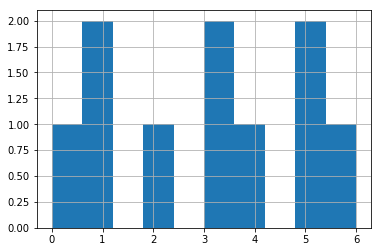

In [137]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()
s.hist()

### String Methods

Can apply typical string methods.

Read more [Vectorized String Methods](http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods)

In [21]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'DOG', 'cat'])
s1 = s.str.lower()
s1.str.findall('a') # find all <input> in each str
s1.str.findall('a').count() # count number of reps of <input>
s1.str.get(0) # get <position> entry

## Merge 
### Concat

In [26]:
df = pd.DataFrame(np.random.randn(10, 4))
df

pieces = [df[:3], df[3:7], df[7:]]
pieces

pd.concat(pieces)

,0,1,2,3
0,-0.115931,-1.627382,0.055465,0.013427
1,-1.677704,-0.673326,0.195172,2.160705
2,1.343515,1.282644,0.591437,0.109905
3,-2.208411,-0.503048,-0.724665,1.803719
4,0.365997,-0.034768,-0.964369,-0.042506
5,-0.442367,-0.252013,0.618186,-0.473313
6,1.995147,1.289141,-0.710232,-1.638755
7,0.400968,1.566638,-0.688565,-0.059123
8,0.885378,0.849539,0.108538,-0.759679
9,0.492808,0.273050,-0.106303,1.112854


### Joins
SQL style.

In [32]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')
# pd.merge? -- > SUPER USEFUL
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, 
#             left_index=False, right_index=False, sort=False, 
#             suffixes=('_x', '_y'), copy=True, indicator=False
#         )


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [34]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.670573,-0.212522,1.002834,-0.820410
1,1.182884,-0.055083,1.013980,-1.004016
2,-0.381674,0.962168,0.777897,-0.541246
3,-0.337712,2.350141,-1.046294,-0.600889
4,0.950183,-0.363253,-0.993800,0.001274
5,0.473319,-0.402448,-0.786171,-0.165605
6,-0.041712,0.671176,0.560957,0.023223
7,1.392641,0.589294,1.002680,0.763822
8,-0.337712,2.350141,-1.046294,-0.600889


## Grouping
By “group by” we are referring to a process involving one or more of the following steps

- **Splitting** the data into groups based on some criteria
- **Applying** a function to each group independently
- **Combining** the results into a data structure



In [41]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                   'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.526002,1.640160
1,bar,one,1.046658,0.144829
2,foo,two,0.128998,0.516019
3,bar,three,-1.977252,-0.415756
4,foo,two,0.194253,-1.102516
5,bar,two,-0.562646,-0.658504
6,foo,one,-0.262876,-0.556656
7,foo,three,-2.292603,0.050816


In [42]:
df.groupby('A').sum() # applies by group
df.groupby(['A','B']).sum() # creates hierarchical index

C         D
A   B                        
bar one    1.046658  0.144829
    three -1.977252 -0.415756
    two   -0.562646 -0.658504
foo one   -0.788878  1.083504
    three -2.292603  0.050816
    two    0.323251 -0.586498

## Reshaping

### Indexing

In [ ]:
# create a list of tuples
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))
# create a MutiIndex object from the list of tuples
# see also pd.MultiIndex.from_arrays, pd.MultiIndex.from_product
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

### Stack

In [51]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     0.068130 -0.644190
      two    -0.160991 -1.573177
baz   one     0.860641 -0.951107
      two     0.765647  1.133950

In [52]:
stacked = df2.stack() #  “compresses” a level in the DataFrame’s columns.
stacked

first  second   
bar    one     A    0.068130
               B   -0.644190
       two     A   -0.160991
               B   -1.573177
baz    one     A    0.860641
               B   -0.951107
       two     A    0.765647
               B    1.133950
dtype: float64

In [55]:
stacked.unstack() # by default, unstacks the last level

A         B
first second                    
bar   one     0.068130 -0.644190
      two    -0.160991 -1.573177
baz   one     0.860641 -0.951107
      two     0.765647  1.133950

In [56]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.068130  0.860641
       B -0.644190 -0.951107
two    A -0.160991  0.765647
       B -1.573177  1.133950

In [57]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.068130 -0.160991
      B -0.644190 -1.573177
baz   A  0.860641  0.765647
      B -0.951107  1.133950

### Pivot Tables

In [61]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.292972,1.990975
1,one,B,foo,0.333784,-0.759843
2,two,C,foo,-0.447544,-0.512702
3,three,A,bar,-0.546344,0.505810
4,one,B,bar,-0.365168,0.877576
5,one,C,bar,-0.398895,0.531670
6,two,A,foo,-1.001262,-0.452850
7,three,B,foo,-0.059975,-0.674776
8,one,C,foo,-0.691211,1.184550
9,one,A,bar,-0.426673,0.902731


In [58]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.590475  0.552646
      B -0.871260  0.631033
      C  0.682749  0.341742
three A -0.347526       NaN
      B       NaN  0.047263
      C  0.179278       NaN
two   A       NaN -1.005050
      B -0.328808       NaN
      C       NaN -1.363090

## Time Series

In [85]:
# create a date time index of 100 secs on 1/1/2012
rng = pd.date_range('1/1/2012', periods=100, freq='S')
# make a series as an index with TIMESTAMPS (REQUIRED) as an index
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
# sum the series every 30s
ts.resample('30S').sum()
# sum the series every min
ts.resample('1Min').sum() # OR # ts.resample('1T').sum()

2012-01-01 00:01:00    14878
2012-01-01 00:02:00    10958
Freq: T, dtype: int64

### Time Zones

In [86]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.608450
2012-03-07    0.570960
2012-03-08   -1.077897
2012-03-09   -0.953652
2012-03-10    1.130583
Freq: D, dtype: float64

In [88]:
# represent as a timezone
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.608450
2012-03-07 00:00:00+00:00    0.570960
2012-03-08 00:00:00+00:00   -1.077897
2012-03-09 00:00:00+00:00   -0.953652
2012-03-10 00:00:00+00:00    1.130583
Freq: D, dtype: float64

In [89]:
# convert to another timezone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.608450
2012-03-06 19:00:00-05:00    0.570960
2012-03-07 19:00:00-05:00   -1.077897
2012-03-08 19:00:00-05:00   -0.953652
2012-03-09 19:00:00-05:00    1.130583
Freq: D, dtype: float64

### Convert between time span representations

In [90]:
# make a list of dates, use them as an index for a series.
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.199522
2012-02-29    0.124790
2012-03-31   -1.170641
2012-04-30    2.064325
2012-05-31   -1.393804
Freq: M, dtype: float64

In [93]:
# change to date -> month
ps = ts.to_period()
ps

2012-01    0.199522
2012-02    0.124790
2012-03   -1.170641
2012-04    2.064325
2012-05   -1.393804
Freq: M, dtype: float64

In [92]:
# change to month -> date 
ps.to_timestamp()

2012-01-01    0.199522
2012-02-01    0.124790
2012-03-01   -1.170641
2012-04-01    2.064325
2012-05-01   -1.393804
Freq: MS, dtype: float64

### Convert types of timeseries used

In [98]:
# creates a list of quarters as a range, use that to index a Series
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
# convert quarter index to a timestamp for convenient operations
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.838927
1990-06-01 09:00    0.122080
1990-09-01 09:00   -0.151457
1990-12-01 09:00   -1.583341
1991-03-01 09:00   -0.107643
Freq: H, dtype: float64

## Catergoricals
Categoricals are a pandas data type, which correspond to categorical variables in statistics: a variable, which can take on only a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood types, country affiliations, observation time or ratings via Likert scales.

In contrast to statistical categorical variables, categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’), but numerical operations (additions, divisions, …) are not possible.

All values of categorical data are either in categories or np.nan. Order is defined by the order of categories, not lexical order of the values. Internally, the data structure consists of a categories array and an integer array of codes which point to the real value in the categories array.

In [109]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [113]:
# convert <raw_grade> to <grade>, a categorical val
df["grade"] = df["raw_grade"].astype("category")
# rename grades [a,b,e] into someting meaningful
df["grade"].cat.categories = ["very good", "good", "very bad"]


# reorder and add missing categories
df["grade"] = df["grade"].cat.set_categories([
    "very bad", "bad", "medium", "good", "very good"])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [115]:
# sorting is done by the order you define
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [116]:
# grouping returns empty categories
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting
[Documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization)

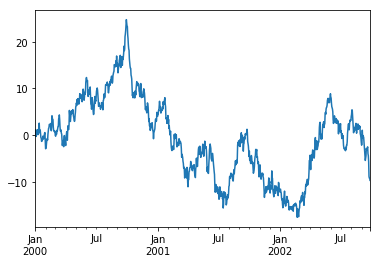

In [107]:
# make a Series with a random normal distribution and a date index
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

# plot the cumsum of the result
ts = ts.cumsum()
ts.plot()

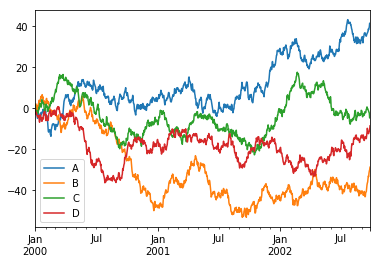

In [108]:
# make a df with 4 normal distributions
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## Importing / Exporting Data

### CSV

In [99]:
df.to_csv('foo.csv')
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D,E
0,0,one,A,foo,-0.292972,1.990975
1,1,one,B,foo,0.333784,-0.759843
2,2,two,C,foo,-0.447544,-0.512702
3,3,three,A,bar,-0.546344,0.505810
4,4,one,B,bar,-0.365168,0.877576
5,5,one,C,bar,-0.398895,0.531670
6,6,two,A,foo,-1.001262,-0.452850
7,7,three,B,foo,-0.059975,-0.674776
8,8,one,C,foo,-0.691211,1.184550
9,9,one,A,bar,-0.426673,0.902731


### HDF5

In [100]:
df.to_hdf('foo.h5','df')
pd.read_hdf('foo.h5','df')

,A,B,C,D,E
0,one,A,foo,-0.292972,1.990975
1,one,B,foo,0.333784,-0.759843
2,two,C,foo,-0.447544,-0.512702
3,three,A,bar,-0.546344,0.505810
4,one,B,bar,-0.365168,0.877576
5,one,C,bar,-0.398895,0.531670
6,two,A,foo,-1.001262,-0.452850
7,three,B,foo,-0.059975,-0.674776
8,one,C,foo,-0.691211,1.184550
9,one,A,bar,-0.426673,0.902731


### Excel

In [103]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D,E
0,one,A,foo,-0.292972,1.990975
1,one,B,foo,0.333784,-0.759843
2,two,C,foo,-0.447544,-0.512702
3,three,A,bar,-0.546344,0.505810
4,one,B,bar,-0.365168,0.877576
5,one,C,bar,-0.398895,0.531670
6,two,A,foo,-1.001262,-0.452850
7,three,B,foo,-0.059975,-0.674776
8,one,C,foo,-0.691211,1.184550
9,one,A,bar,-0.426673,0.902731
